In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Conv2D , MaxPool2D , BatchNormalization,Dropout,Flatten,Dense,ReLU
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
local_zip = '/content/drive/My Drive/Zipped file/Train_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Train')
local_zip = '/content/drive/My Drive/Zipped file/Test_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Test')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_atrial_dir = os.path.join('/tmp/Train/Train/Atrial Premature Contraction')

# Directory with our training human pictures
train_left_dir = os.path.join('/tmp/Train/Train/Left Bundle Branch Block')

# Directory with our training horse pictures
validation_atrail_dir = os.path.join('/tmp/Test/Test/Atrial Premature Contraction')

# Directory with our training human pictures
validation_left_dir = os.path.join('/tmp/Test/Test/Left Bundle Branch Block')

In [ ]:
train_horse_names = os.listdir(train_atrial_dir)
train_human_names = os.listdir(train_left_dir)

validation_horse_hames = os.listdir(validation_atrail_dir)
validation_human_names = os.listdir(validation_left_dir)

In [ ]:
'''train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True)
    '''
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   #rotation_range = 40,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(
    rescale=1/255
   )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/Train/Train', 
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/tmp/Test/Test',
        target_size=(150, 150), 
        batch_size=16,
       
        class_mode='categorical')

Found 14708 images belonging to 7 classes.
Found 591 images belonging to 7 classes.


In [ ]:
#IMAGE_SIZE = [150,150]
model = Sequential()

model.add(Conv2D(64, (3,3),strides = (1,1), input_shape =(150,150,3),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(1024))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(128))

model.add(keras.layers.ReLU())

model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=16,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/30
16/16 [==============================] - 10s 620ms/step - loss: 0.0721 - accuracy: 0.9720 - val_loss: 43.2944 - val_accuracy: 0.1328
Epoch 2/30
16/16 [==============================] - 10s 607ms/step - loss: 0.0796 - accuracy: 0.9785 - val_loss: 37.3773 - val_accuracy: 0.1641
Epoch 3/30
16/16 [==============================] - 10s 608ms/step - loss: 0.1245 - accuracy: 0.9707 - val_loss: 48.9226 - val_accuracy: 0.1172
Epoch 4/30
16/16 [==============================] - 10s 607ms/step - loss: 0.0808 - accuracy: 0.9727 - val_loss: 44.1545 - val_accuracy: 0.1719
Epoch 5/30
16/16 [==============================] - 10s 608ms/step - loss: 0.0405 - accuracy: 0.9863 - val_loss: 21.1522 - val_accuracy: 0.1811
Epoch 6/30
16/16 [==============================] - 10s 609ms/step - loss: 0.0616 - accuracy: 0.9746 - val_loss: 29.7978 - val_accuracy: 0.2266
Epoch 7/30
16/16 [==============================] - 10s 609ms/step - loss: 0.1068 - accuracy: 0.9727 - val_loss: 51.6143 - val_accuracy:

**Using transfer Learning ----> Inceptionv3 model**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  


--2020-05-27 15:42:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   150MB/s    in 0.6s    

2020-05-27 15:42:58 (150 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 74, 74, 32)   96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 74, 74, 32)   0           batch_normalization_564[0][0]    
_______________________________________________________________________________________

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (7, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])




In [ ]:
'''history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)'''

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=50,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=16,
      callbacks=[callbacks]
      )

Epoch 1/30
50/50 [==============================] - 12s 230ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 1.5544 - val_accuracy: 0.8320
Epoch 2/30
50/50 [==============================] - 11s 225ms/step - loss: 0.0425 - accuracy: 0.9899 - val_loss: 0.9852 - val_accuracy: 0.7930
Epoch 3/30
50/50 [==============================] - 11s 219ms/step - loss: 0.0270 - accuracy: 0.9887 - val_loss: 0.5708 - val_accuracy: 0.8398
Epoch 4/30
50/50 [==============================] - 11s 217ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.4987 - val_accuracy: 0.8750
Epoch 5/30
50/50 [==============================] - 11s 218ms/step - loss: 0.0584 - accuracy: 0.9837 - val_loss: 0.1789 - val_accuracy: 0.9375
Epoch 6/30
50/50 [==============================] - 11s 226ms/step - loss: 0.0289 - accuracy: 0.9919 - val_loss: 0.9240 - val_accuracy: 0.7812
Epoch 7/30
50/50 [==============================] - 11s 218ms/step - loss: 0.0410 - accuracy: 0.9881 - val_loss: 0.5551 - val_accuracy: 0.8320

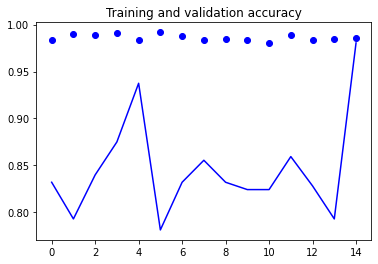

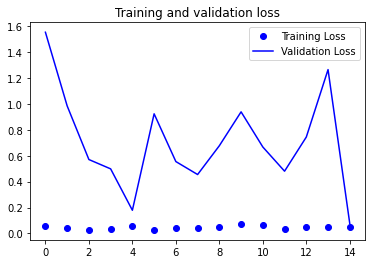

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()